In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
from pylab import rcParams

import warnings
warnings.filterwarnings("ignore")

import os
os.chdir("C:\\Users\\tamil\\OneDrive\\Documents\\Python Directory")

pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

folder = "NTT Data/"

In [265]:
df = pd.read_csv(folder+"Train.csv")
df = df.drop("Unnamed: 0", axis = 1)
print(f"Train set dim :\n{df.shape}")

Train set dim :
(150000, 11)


In [266]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


# Basic Information

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [268]:
print("Percentage of missing values")
print("============================")

for var in df.columns:
    if df[var].isna().sum() >1:
        miss = np.round(df[var].isna().sum()/df.shape[0] * 100,3)
        print(var, "has {0}% of missing values".format(miss))

Percentage of missing values
MonthlyIncome has 19.821% of missing values
NumberOfDependents has 2.616% of missing values


In [269]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


# Target Variable

In [270]:
print("Unique Class in Target Variable: ",df["SeriousDlqin2yrs"].nunique())

Unique Class in Target Variable:  2


In [271]:
df.SeriousDlqin2yrs.value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

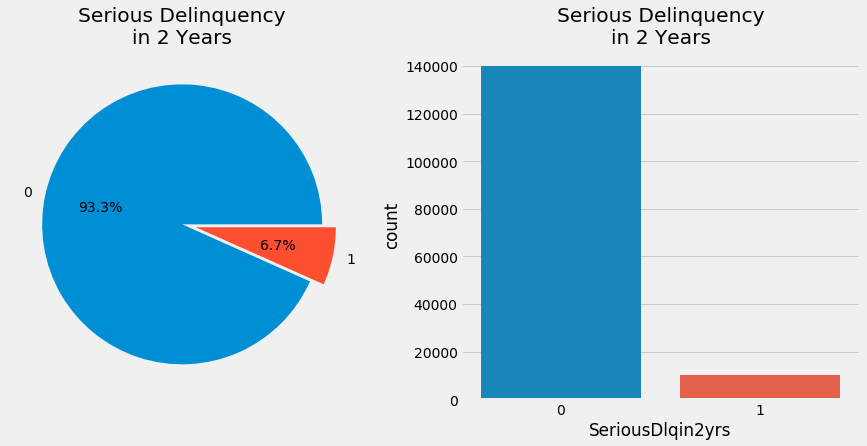

In [272]:
f,ax=plt.subplots(1,2,figsize=(14,6))
df['SeriousDlqin2yrs'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=False)
ax[0].set_title('Serious Delinquency\nin 2 Years')
ax[0].set_ylabel('')
sns.countplot('SeriousDlqin2yrs',data=df,ax=ax[1])
ax[1].set_title('Serious Delinquency\nin 2 Years')
plt.savefig(folder+'target.png',bbox_inches='tight')
plt.show()

There is clear problem here, we have an unbalanced target class!! we will check the event rate of financial distress (SeriousDlqin2yrs) in our dataset

In [273]:
class_0 = df.SeriousDlqin2yrs.value_counts()[0]
class_1 = df.SeriousDlqin2yrs.value_counts()[1]
print("Total number of class_0: {}".format(class_0))
print("Total number of class_1: {}".format(class_1))
print("Event rate: {} %".format(class_1/(class_0+class_1) *100))

Total number of class_0: 139974
Total number of class_1: 10026
Event rate: 6.683999999999999 %


We have an event rate of 6.68%, consequences of having this kind of target class is most likely that the minority class is being ignored by the algorithm and will predict the new instances to class_0 as it was the safest way to have a great accuracy.

# Exploratory Data Analysis And Preprocessing

### Univariate Analysis

The objective of univariate analysis is to examine each of the variables one by one. The focus will be on the distribution of the variable.

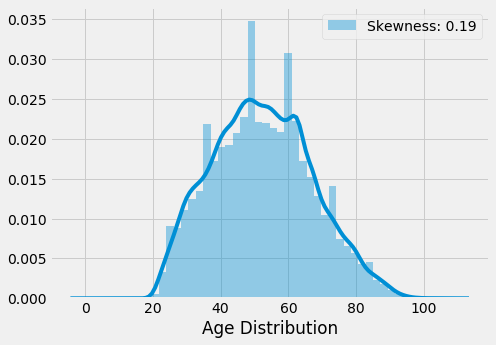

In [274]:
plt.rcParams["figure.figsize"] = 7,5
sns.distplot(df["age"], label="Skewness: {}".format(np.round(df.age.skew(),2)))
plt.xlabel("Age Distribution")
plt.legend()
plt.show()

In [275]:
df.loc[df["age"] < 18] #less than legal age

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
65695,0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0


In [276]:
df.loc[df["age"] == 0, "age"] = df.age.median()

We're done with the age feature, now we will go and impute missing values for the MonthlyIncome feature. We will tackle this differently by bracketing ages with the working (18 to 60) and senior (60 and above). First, let's create a temporary dataframes for them and compute for each's median then impute the values accordingly.

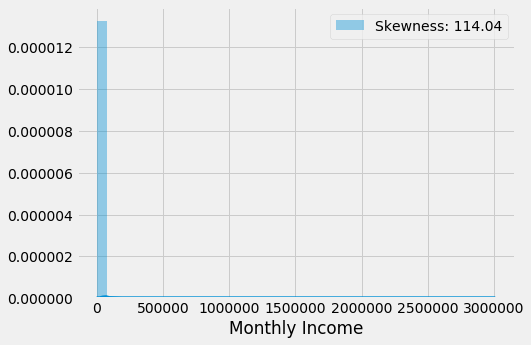

In [277]:
plt.rcParams["figure.figsize"] = 7,5
sns.distplot(df["MonthlyIncome"], label="Skewness: {}".format(np.round(df.MonthlyIncome.skew(),2)), bins=40)
plt.xlabel("Monthly Income")
plt.legend()
plt.show()

No handles with labels found to put in legend.


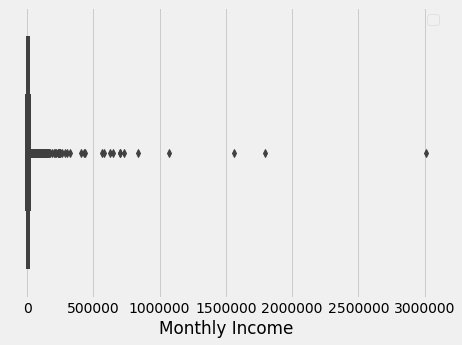

In [278]:
plt.rcParams["figure.figsize"] = 7,5
sns.boxplot(df["MonthlyIncome"])
plt.xlabel("Monthly Income")
plt.legend()
plt.show()

In [279]:
age_working = df.loc[(df["age"] >= 18) & (df["age"] < 60)]
age_senior = df.loc[(df["age"] >= 60)]

age_working_impute = age_working.MonthlyIncome.mean()
age_senior_impute = age_senior.MonthlyIncome.mean()

In [280]:
df["MonthlyIncome"] = np.absolute(df["MonthlyIncome"])
df["MonthlyIncome"] = df["MonthlyIncome"].fillna(-1)

df.loc[((df["age"] >= 18) & (df["age"] < 60)) & (df["MonthlyIncome"] == -1),\
               "MonthlyIncome"] = age_working_impute
df.loc[(df["age"] >= 60) & (df["MonthlyIncome"] == -1), "MonthlyIncome"] = age_senior_impute

We're done with the Monthly Income, now we will move to the NumberOfDependents (Discrete) feature.

In [281]:
df["NumberOfDependents"].mode()

0    0.0
dtype: float64

In [282]:
df["NumberOfDependents"] = np.absolute(df["NumberOfDependents"])
df["NumberOfDependents"] = df["NumberOfDependents"].fillna(0)
df["NumberOfDependents"] = df["NumberOfDependents"].astype('int64')

I decided not to go through each of the numberofdependents feature and impute it by the mode. We will now take a look at the correlation of the features to the target variable.

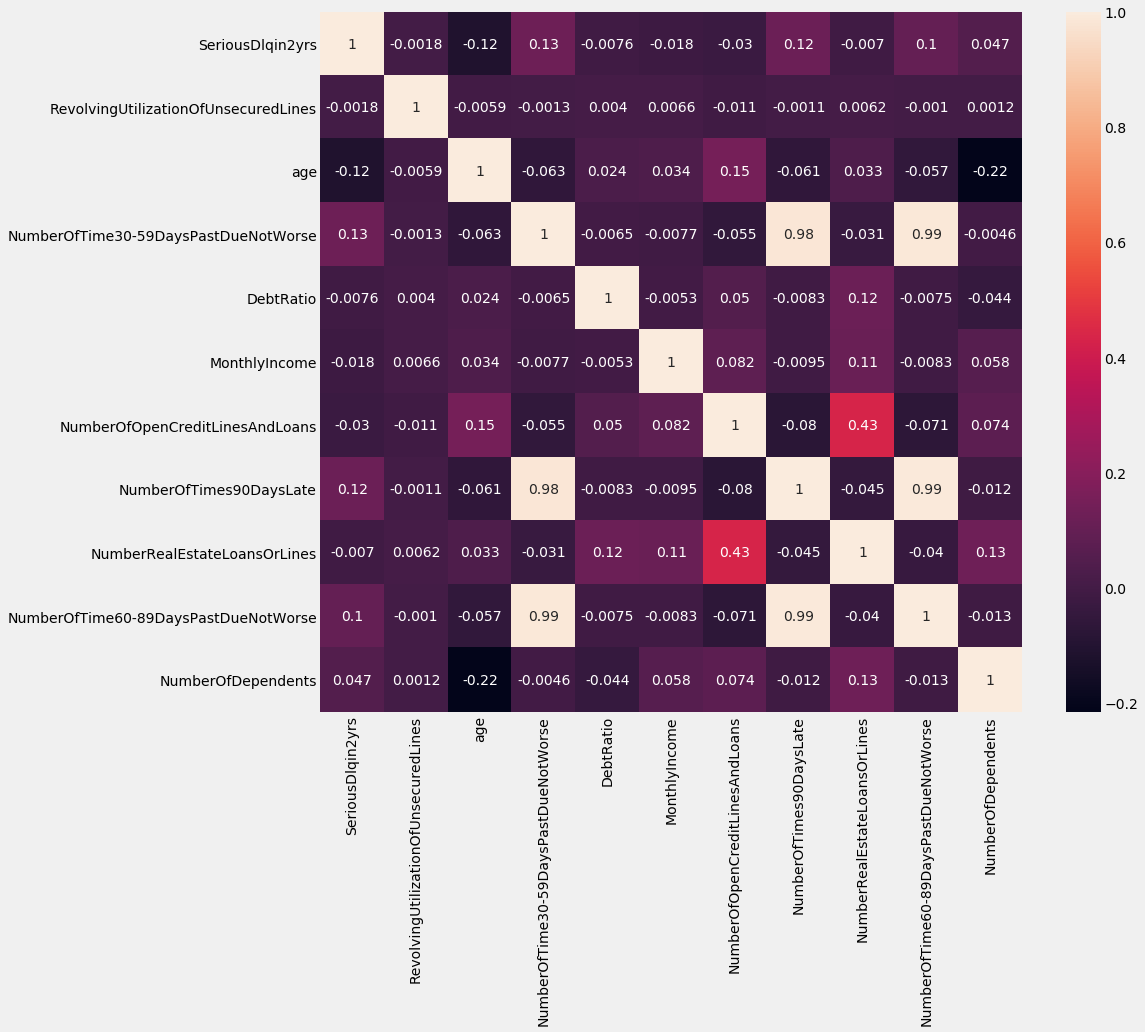

In [283]:
corr = df.corr()
plt.figure(figsize=(14,12))
sns.heatmap(corr, annot=True, fmt=".2g")

Findings: As expected, the NumberOfTimes90DaysLate, NumberOfTime60-89DaysPastDueNotWorse and NumberOfTime30-59DaysPastDueNotWorse are highly correlated to each other and keeping all those features won't help the prediction power of algorithms(avoiding multicollinearity). I came up with 2 ways to handle this, drop the other 2 features and keep 1 or combine the three features and make a binary feature that classify if a borrower defaulted any loan/credit payment. Also, the NumberOfOpenCreditLinesAndLoans and NumberRealEstateLoansOrLines features are somehow correlated to each other but has different degree of correlation from our target class we can also handle this features the same way as we will handle the past due/late features.

We will go with feature engineering the pastdue/late features (because a default is a default!) and credit/loans features but providing a buffer since debts are everywhere!

In [284]:
df["CombinedDefaulted"] = (df["NumberOfTimes90DaysLate"] + df["NumberOfTime60-89DaysPastDueNotWorse"])\
                                        + df["NumberOfTime30-59DaysPastDueNotWorse"]
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,CombinedDefaulted
0,1,0.766127,45.0,2,0.802982,9120.0,13,0,6,0,2,2
1,0,0.957151,40.0,0,0.121876,2600.0,4,0,0,0,1,0
2,0,0.658180,38.0,1,0.085113,3042.0,2,1,0,0,0,2
3,0,0.233810,30.0,0,0.036050,3300.0,5,0,0,0,0,0
4,0,0.907239,49.0,1,0.024926,63588.0,7,0,1,0,0,1


In [285]:
df.loc[(df["CombinedDefaulted"] >= 1), "CombinedDefaulted"] = 1

In [286]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,CombinedDefaulted
0,1,0.766127,45.0,2,0.802982,9120.0,13,0,6,0,2,1
1,0,0.957151,40.0,0,0.121876,2600.0,4,0,0,0,1,0
2,0,0.658180,38.0,1,0.085113,3042.0,2,1,0,0,0,1
3,0,0.233810,30.0,0,0.036050,3300.0,5,0,0,0,0,0
4,0,0.907239,49.0,1,0.024926,63588.0,7,0,1,0,0,1


In [287]:
df["CombinedCreditLoans"] = df["NumberOfOpenCreditLinesAndLoans"] + \
                                        df["NumberRealEstateLoansOrLines"]

In [288]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,CombinedDefaulted,CombinedCreditLoans
0,1,0.766127,45.0,2,0.802982,9120.0,13,0,6,0,2,1,19
1,0,0.957151,40.0,0,0.121876,2600.0,4,0,0,0,1,0,4
2,0,0.658180,38.0,1,0.085113,3042.0,2,1,0,0,0,1,2
3,0,0.233810,30.0,0,0.036050,3300.0,5,0,0,0,0,0,5
4,0,0.907239,49.0,1,0.024926,63588.0,7,0,1,0,0,1,8


In [289]:
df.loc[(df["CombinedCreditLoans"] <= 5), "CombinedCreditLoans"] = 0
df.loc[(df["CombinedCreditLoans"] > 5), "CombinedCreditLoans"] = 1
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,CombinedDefaulted,CombinedCreditLoans
0,1,0.766127,45.0,2,0.802982,9120.0,13,0,6,0,2,1,1
1,0,0.957151,40.0,0,0.121876,2600.0,4,0,0,0,1,0,0
2,0,0.658180,38.0,1,0.085113,3042.0,2,1,0,0,0,1,0
3,0,0.233810,30.0,0,0.036050,3300.0,5,0,0,0,0,0,0
4,0,0.907239,49.0,1,0.024926,63588.0,7,0,1,0,0,1,1


In [290]:
df["WithDependents"] = df["NumberOfDependents"]
df.loc[(df["WithDependents"] >= 1), "WithDependents"] = 1

Next, we will create a binary feature WithDependents which is derived from the NumberOfDependents feature.


Also, from the description of the data,
DebtRatio = Monthly debt payments / monthly gross income. we will extract MonthlyDebtPayments from this formula to get a new feature.

In [291]:
df["MonthlyDebtPayments"] = df["DebtRatio"] * df["MonthlyIncome"]
df["MonthlyDebtPayments"] = np.absolute(df["MonthlyDebtPayments"])
df["MonthlyDebtPayments"] = df["MonthlyDebtPayments"].astype('int64')

### Creating New Feature

Let's see if we can get a good predictor out of age feature. using senior and working temporary dataframes earlier.

In [292]:
df["age_map"] = df["age"]
df.loc[(df["age"] >= 18) & (df["age"] < 60), "age_map"] = 1
df.loc[(df["age"] >= 60), "age_map"] = 0 

In [293]:
#replacing those numbers to categorical features then get the dummy variables
df["age_map"] = df["age_map"].replace(0, "working")
df["age_map"] = df["age_map"].replace(1, "senior")

In [294]:
df = pd.concat([df, pd.get_dummies(df.age_map,prefix='is')], axis=1)

Now let's look at the correlation matrix to decide to retain or drop the engineered features (avoiding multicollinearity).

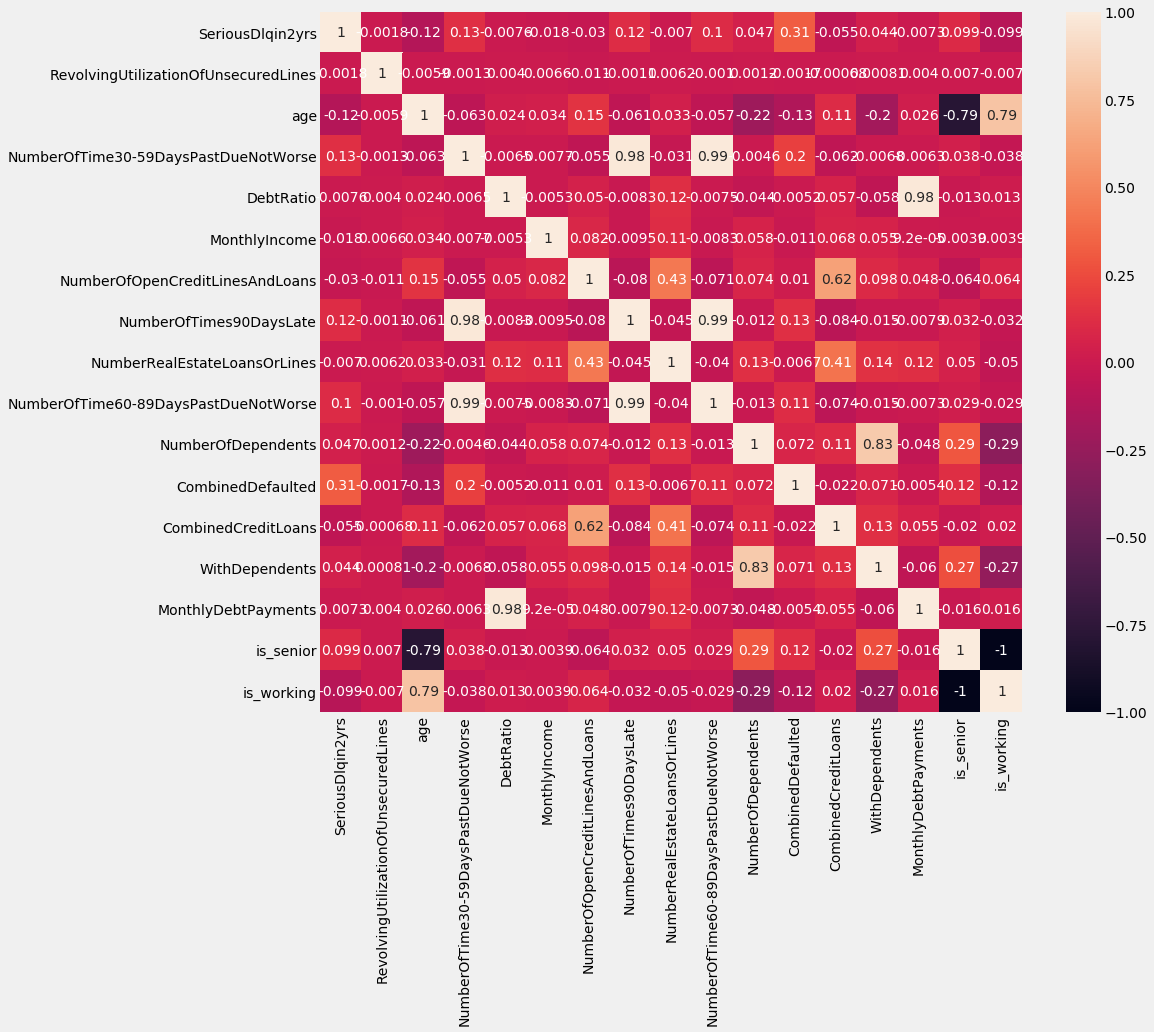

In [295]:
corr = df.corr()
plt.figure(figsize=(14,12))
sns.heatmap(corr, annot=True, fmt=".2g");

Findings:

    -we will retain CombinedDefaulted feature as it clearly a good predictor of our target class than the three features it was  derived from.
    -we will retain NumberOfTime30-59DaysPastDueNotWorse and drop the other two features derived from CombinedDefaulted as  it gives a more meaningful information on our target variable (also, it looks like this is the medium range of time a borrower defaulted a payment)
    -we will drop the engineered is_working and is_senior feature since age feature outperforms them.
    -we will drop also the WithDependents
    -we will retain CombinedCreditLoans also since it outperforms the two features it came from.
    -we will drop MonthlyDebtPayments

In [296]:
df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'CombinedDefaulted', 'CombinedCreditLoans',
       'WithDependents', 'MonthlyDebtPayments', 'age_map', 'is_senior',
       'is_working'],
      dtype='object')

In [297]:
df.drop(["NumberOfOpenCreditLinesAndLoans",\
                 "NumberOfTimes90DaysLate","NumberRealEstateLoansOrLines","NumberOfTime60-89DaysPastDueNotWorse",\
                 "WithDependents","age_map","is_senior","is_working", "MonthlyDebtPayments"], axis=1, inplace=True)

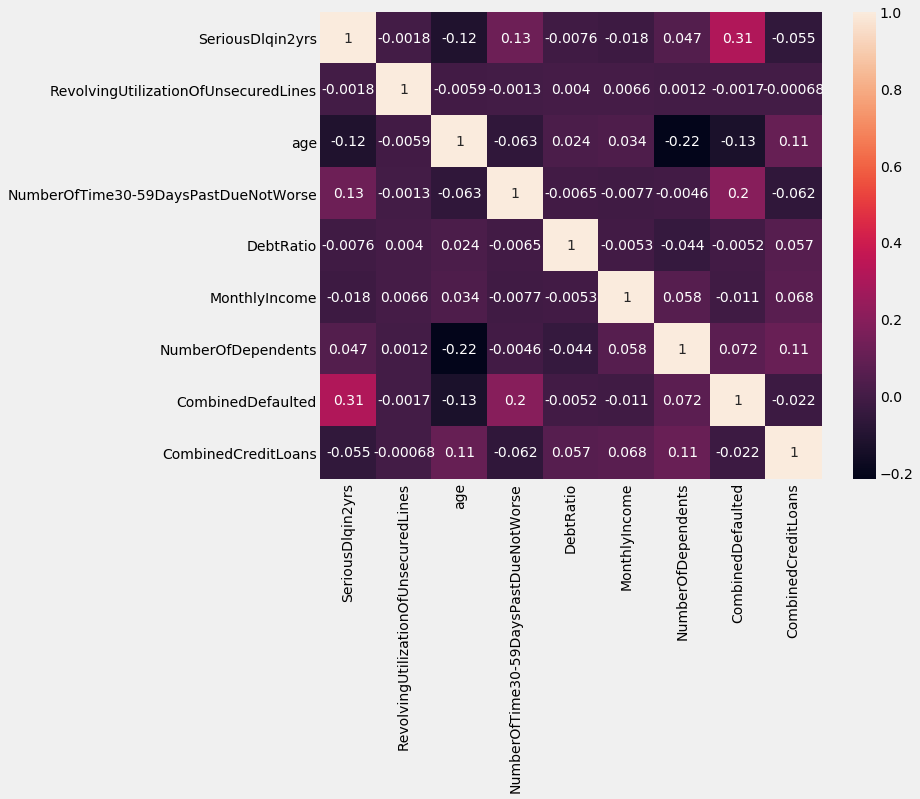

In [298]:
#now let's take a look at the filtered final features to be used in predicting the financial distress for the next two years
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2g")

we now have clean training dataset. now it's ready to apply algorithms to it but before that, since we have unbalanced dataset we know that this will not generalized well in the test set. So, we need to perform the undersampling or penalized kernels as we shortlisted those strategies earlier.

Now let's also clean the test set! Since we have concluded what features to retain and drop. we will skip some of the process.

# Model Building

In [299]:
X = df.drop("SeriousDlqin2yrs", axis = 1)
Y = df["SeriousDlqin2yrs"]

In [300]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate,GridSearchCV, train_test_split
from sklearn import metrics
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [301]:
train_x, test_x, train_y, test_y = train_test_split(X,Y, test_size = 0.3,random_state = 42)

In [314]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, train_x, test_x, train_y, test_y, train=True):
    if train:
        pred = clf.predict(train_x)
        print("Train Result:\n================================================")
        print("Accuracy Score: ", metrics.accuracy_score(train_y,pred)*100,"%")
        print("_______________________________________________")
        print("Classification Report:\n",metrics.classification_report(train_y,pred))
        print()
        print("Classification Report2:", end='')
        print(f"\tPrecision Score: {precision_score(train_y,pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(train_y,pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(train_y,pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(train_y,pred)}\n")
        
    elif train==False:
        pred = clf.predict(test_x)
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(test_y, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:\n",metrics.classification_report(test_y,pred))
        print()
        print("Classification Report2:", end='')
        print(f"\tPrecision Score: {precision_score(test_y, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(test_y, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(test_y, pred) * 100:.2f}%")
#         print("_______________________________________________")
#         print(f"Confusion Matrix: \n {confusion_matrix(test_y, pred)}\n")
        
        
        conf_matrix = confusion_matrix(test_y, pred)
        f, ax = plt.subplots(figsize=(4, 4))
        sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
        plt.title("Confusion Matrix", fontsize=20)
        plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
        ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
        ax.set_xticklabels("")
        ax.set_yticklabels(['0', '1'], fontsize=16, rotation=360)
        plt.show()

Train Result:
Accuracy Score:  93.28476190476191 %
_______________________________________________
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97     97954
           1       0.49      0.01      0.03      7046

    accuracy                           0.93    105000
   macro avg       0.71      0.51      0.50    105000
weighted avg       0.90      0.93      0.90    105000


Classification Report2:	Precision Score: 48.82%
			Recall Score: 1.46%
			F1 score: 2.84%
_______________________________________________
Confusion Matrix: 
 [[97846   108]
 [ 6943   103]]

Test Result:
Accuracy Score: 93.32%
_______________________________________________
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97     42020
           1       0.36      0.01      0.02      2980

    accuracy                           0.93     45000
   macro avg       0.65      0.50

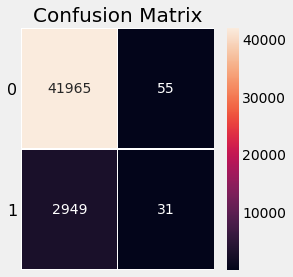

In [315]:
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(train_x,train_y)
print_score(log_reg,train_x, test_x, train_y, test_y,train = True)
print_score(log_reg,train_x, test_x, train_y, test_y,train = False)

In [316]:
test_score = f1_score(test_y, log_reg.predict(test_x)) * 100
train_score = f1_score(train_y, log_reg.predict(train_x)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training f1_score %', 'Testing f1_score %'])
results_df

,Model,Training f1_score %,Testing f1_score %
0,Logistic Regression,2.838639,2.022179


Train Result:
Accuracy Score:  99.95142857142856 %
_______________________________________________
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     97954
           1       1.00      0.99      1.00      7046

    accuracy                           1.00    105000
   macro avg       1.00      1.00      1.00    105000
weighted avg       1.00      1.00      1.00    105000


Classification Report2:	Precision Score: 99.89%
			Recall Score: 99.39%
			F1 score: 99.64%
_______________________________________________
Confusion Matrix: 
 [[97946     8]
 [   43  7003]]

Test Result:
Accuracy Score: 93.29%
_______________________________________________
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96     42020
           1       0.47      0.12      0.19      2980

    accuracy                           0.93     45000
   macro avg       0.71      0.

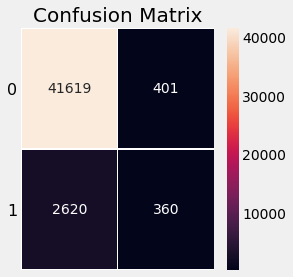

In [317]:
rand_forest = RandomForestClassifier(n_estimators=1000, random_state=42)
rand_forest.fit(train_x, train_y)

print_score(rand_forest,train_x, test_x, train_y, test_y,train = True)
print_score(rand_forest,train_x, test_x, train_y, test_y,train = False)

In [318]:
test_score = f1_score(test_y, rand_forest.predict(test_x)) * 100
train_score = f1_score(train_y, rand_forest.predict(train_x)) * 100


results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training f1_score %', 'Testing f1_score %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training f1_score %,Testing f1_score %
0,Logistic Regression,2.838639,2.022179
1,Random Forest Classifier,99.637191,19.246191


Train Result:
Accuracy Score:  93.50857142857143 %
_______________________________________________
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     97954
           1       0.60      0.10      0.16      7046

    accuracy                           0.94    105000
   macro avg       0.77      0.55      0.57    105000
weighted avg       0.92      0.94      0.91    105000


Classification Report2:	Precision Score: 60.30%
			Recall Score: 9.55%
			F1 score: 16.49%
_______________________________________________
Confusion Matrix: 
 [[97511   443]
 [ 6373   673]]

Test Result:
Accuracy Score: 93.54%
_______________________________________________
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     42020
           1       0.58      0.09      0.15      2980

    accuracy                           0.94     45000
   macro avg       0.76      0.5

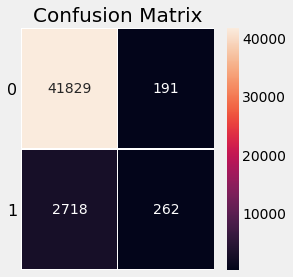

In [319]:
xgb = XGBClassifier()
xgb.fit(train_x, train_y)


print_score(xgb, train_x, test_x, train_y, test_y,train = True)
print_score(xgb, train_x, test_x, train_y, test_y,train = False)

In [320]:
test_score = f1_score(test_y, xgb.predict(test_x)) * 100
train_score = f1_score(train_y, xgb.predict(train_x)) * 100

results_df_2 = pd.DataFrame(data=[["XG Boost", train_score, test_score]], 
                          columns=['Model', 'Training f1_score %', 'Testing f1_score %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training f1_score %,Testing f1_score %
0,Logistic Regression,2.838639,2.022179
1,Random Forest Classifier,99.637191,19.246191
2,XG Boost,16.491056,15.263618


Train Result:
Accuracy Score:  94.31142857142856 %
_______________________________________________
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     97954
           1       0.86      0.18      0.30      7046

    accuracy                           0.94    105000
   macro avg       0.90      0.59      0.64    105000
weighted avg       0.94      0.94      0.93    105000


Classification Report2:	Precision Score: 85.98%
			Recall Score: 18.19%
			F1 score: 30.03%
_______________________________________________
Confusion Matrix: 
 [[97745   209]
 [ 5764  1282]]

Test Result:
Accuracy Score: 93.38%
_______________________________________________
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97     42020
           1       0.50      0.09      0.16      2980

    accuracy                           0.93     45000
   macro avg       0.72      0.

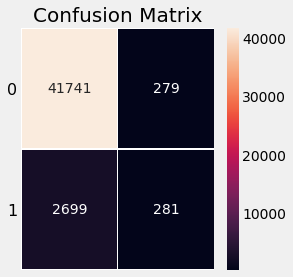

In [321]:
cat_boost = CatBoostClassifier(logging_level="Silent")
cat_boost.fit(train_x, train_y)


print_score(cat_boost, train_x, test_x, train_y, test_y,train = True)
print_score(cat_boost, train_x, test_x, train_y, test_y,train = False)

In [322]:
test_score = f1_score(test_y, cat_boost.predict(test_x)) * 100
train_score = f1_score(train_y, cat_boost.predict(train_x)) * 100

results_df_2 = pd.DataFrame(data=[["Cat Boost", train_score, test_score]], 
                          columns=['Model', 'Training f1_score %', 'Testing f1_score %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training f1_score %,Testing f1_score %
0,Logistic Regression,2.838639,2.022179
1,Random Forest Classifier,99.637191,19.246191
2,XG Boost,16.491056,15.263618
3,Cat Boost,30.033970,15.875706


Train Result:
Accuracy Score:  93.75333333333333 %
_______________________________________________
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     97954
           1       0.71      0.12      0.20      7046

    accuracy                           0.94    105000
   macro avg       0.83      0.56      0.58    105000
weighted avg       0.92      0.94      0.92    105000


Classification Report2:	Precision Score: 71.30%
			Recall Score: 11.57%
			F1 score: 19.90%
_______________________________________________
Confusion Matrix: 
 [[97626   328]
 [ 6231   815]]

Test Result:
Accuracy Score: 93.48%
_______________________________________________
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97     42020
           1       0.55      0.09      0.15      2980

    accuracy                           0.93     45000
   macro avg       0.74      0.

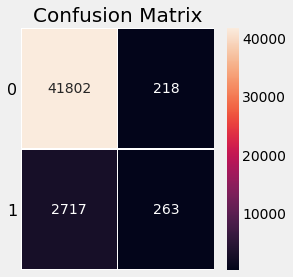

In [323]:
lgb = LGBMClassifier()
lgb.fit(train_x, train_y)


print_score(lgb, train_x, test_x, train_y, test_y,train = True)
print_score(lgb, train_x, test_x, train_y, test_y,train = False)

In [325]:
test_score = f1_score(test_y, lgb.predict(test_x)) * 100
train_score = f1_score(train_y, lgb.predict(train_x)) * 100

results_df_2 = pd.DataFrame(data=[["Light Gradient Boost", train_score, test_score]], 
                          columns=['Model', 'Training f1_score %', 'Testing f1_score %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training f1_score %,Testing f1_score %
0,Logistic Regression,2.838639,2.022179
1,Random Forest Classifier,99.637191,19.246191
2,XG Boost,16.491056,15.263618
3,Cat Boost,30.033970,15.875706
4,Light Gradient Boost,19.904750,15.197920


# HYPERPARAMETER TUNING TO GET BEST MODEL

### LIGHT GBM

Train Result:
Accuracy Score:  90.31809523809524 %
_______________________________________________
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95     97954
           1       0.35      0.51      0.41      7046

    accuracy                           0.90    105000
   macro avg       0.66      0.72      0.68    105000
weighted avg       0.92      0.90      0.91    105000


Classification Report2:	Precision Score: 34.82%
			Recall Score: 50.79%
			F1 score: 41.32%
_______________________________________________
Confusion Matrix: 
 [[91255  6699]
 [ 3467  3579]]

Test Result:
Accuracy Score: 90.53%
_______________________________________________
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95     42020
           1       0.35      0.50      0.41      2980

    accuracy                           0.91     45000
   macro avg       0.66      0.

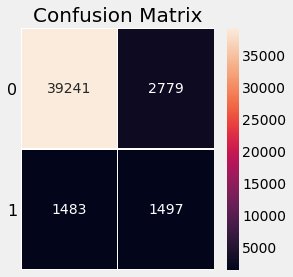

In [340]:
lgbm = LGBMClassifier(max_depth=4,
                       num_leaves=5,
                       learning_rate=0.1,
                       n_estimators=692,
                       min_data_in_leaf = 95,
                       feature_fraction = 0.05,
                       min_child_weight=5,
                       min_child_samples=15,
                       colsample_bytree=0.15,
                       reg_alpha=0.5,
                       reg_lambda=2,
                       random_state=100,
                       class_weight={0:0.2, 1: 0.8}
                       )
lgbm.fit(train_x, train_y)

print_score(lgbm, train_x, test_x, train_y, test_y,train = True)
print_score(lgbm, train_x, test_x, train_y, test_y,train = False)

In [341]:
test_score = f1_score(test_y, lgbm.predict(test_x)) * 100
train_score = f1_score(train_y, lgbm.predict(train_x)) * 100

results_df = pd.DataFrame(data=[["LGBM", train_score, test_score]], 
                          columns=['Model', 'Training f1_score %', 'Testing f1_score %'])
results_df

,Model,Training f1_score %,Testing f1_score %
0,LGBM,41.318402,41.262404


In [342]:
f1 = []

from sklearn.model_selection import StratifiedKFold, KFold

fold = KFold(n_splits=5, shuffle=True, random_state=100)
i = 1
for train_index, test_index in fold.split(X, Y):
    x_train, x_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = Y[train_index], Y[test_index]
    m = LGBMClassifier(max_depth=4,
                       num_leaves=5,
                       learning_rate=0.1,
                       n_estimators=615,
                       min_data_in_leaf = 95,
                       feature_fraction = 0.05,
                       min_child_weight=5,
                       min_child_samples=15,
                       colsample_bytree=0.15,
                       reg_alpha=0.5,
                       reg_lambda=2,
                       random_state=100,
                       class_weight={0:0.2, 1: 0.8}
                       )
    m.fit(x_train, y_train)
    pred_y = m.predict(x_val)
    print(i, " f1_lgbm: ", (f1_score(y_val, pred_y)))
    f1.append((f1_score(y_val, pred_y)))
    i = i + 1
    
print()    
print("LGBM F1 Score : ", np.mean(f1))

1  f1_lgbm:  0.4047424366312347
2  f1_lgbm:  0.4120294599018003
3  f1_lgbm:  0.3972602739726028
4  f1_lgbm:  0.42148598314056074
5  f1_lgbm:  0.4072398190045249

LGBM F1 Score :  0.40855159453014467


### XG Boost

Train Result:
Accuracy Score:  42.971428571428575 %
_______________________________________________
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.39      0.56     97954
           1       0.10      0.98      0.19      7046

    accuracy                           0.43    105000
   macro avg       0.55      0.69      0.37    105000
weighted avg       0.94      0.43      0.54    105000


Classification Report2:	Precision Score: 10.37%
			Recall Score: 98.13%
			F1 score: 18.76%
_______________________________________________
Confusion Matrix: 
 [[38206 59748]
 [  132  6914]]

Test Result:
Accuracy Score: 42.79%
_______________________________________________
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.39      0.56     42020
           1       0.10      0.95      0.18      2980

    accuracy                           0.43     45000
   macro avg       0.55      0

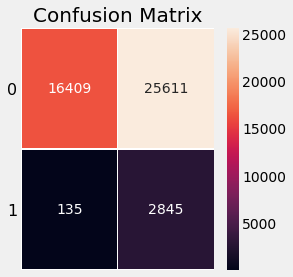

In [343]:
BEST_PARAMS =  {'bagging_fraction': 0.8993155305338455, 'colsample_bytree': 0.7463058454739352, 
               'feature_fraction': 0.7989765808988153, 'gamma': 0.6665437467229817, 'learning_rate': 0.013887824598276186, 
               'max_depth': 3, 'min_child_samples': 170, 'num_leaves': 220, 
               'reg_alpha': 0.39871702770778467, 'reg_lambda': 0.24309304355829786, 'subsample': 0.7}


xgboost = XGBClassifier(n_estimators=400, scale_pos_weight=90)

xgboost.fit(train_x, train_y)

print_score(xgboost, train_x, test_x, train_y, test_y,train = True)
print_score(xgboost, train_x, test_x, train_y, test_y,train = False)

In [344]:
test_score = f1_score(test_y, xgboost.predict(test_x)) * 100
train_score = f1_score(train_y, xgboost.predict(train_x)) * 100

results_df_2 = pd.DataFrame(data=[["XG Boost", train_score, test_score]], 
                          columns=['Model', 'Training f1_score %', 'Testing f1_score %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training f1_score %,Testing f1_score %
0,LGBM,41.318402,41.262404
1,XG Boost,18.760514,18.100267


### Random Forest

Train Result:
Accuracy Score:  90.34476190476191 %
_______________________________________________
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95     97954
           1       0.34      0.49      0.40      7046

    accuracy                           0.90    105000
   macro avg       0.65      0.71      0.68    105000
weighted avg       0.92      0.90      0.91    105000


Classification Report2:	Precision Score: 34.44%
			Recall Score: 48.55%
			F1 score: 40.29%
_______________________________________________
Confusion Matrix: 
 [[91441  6513]
 [ 3625  3421]]

Test Result:
Accuracy Score: 90.44%
_______________________________________________
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95     42020
           1       0.34      0.48      0.40      2980

    accuracy                           0.90     45000
   macro avg       0.65      0.

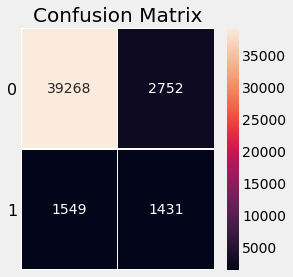

In [345]:
rf = RandomForestClassifier(bootstrap=True, max_features=0.45, 
                            min_samples_leaf=1, min_samples_split=5,
                            n_estimators=1000,class_weight={0:0.2, 1: 0.8}, max_depth = 3)

rf.fit(train_x, train_y)

print_score(rf, train_x, test_x, train_y, test_y,train = True)
print_score(rf, train_x, test_x, train_y, test_y,train = False)

In [346]:
test_score = f1_score(test_y, rf.predict(test_x)) * 100
train_score = f1_score(train_y, rf.predict(train_x)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest", train_score, test_score]], 
                          columns=['Model', 'Training f1_score %', 'Testing f1_score %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training f1_score %,Testing f1_score %
0,LGBM,41.318402,41.262404
1,XG Boost,18.760514,18.100267
2,Random Forest,40.294464,39.955326


### Cat Boost

Train Result:
Accuracy Score:  86.78761904761905 %
_______________________________________________
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.88      0.93     97954
           1       0.31      0.76      0.44      7046

    accuracy                           0.87    105000
   macro avg       0.64      0.82      0.68    105000
weighted avg       0.94      0.87      0.89    105000


Classification Report2:	Precision Score: 30.52%
			Recall Score: 75.90%
			F1 score: 43.53%
_______________________________________________
Confusion Matrix: 
 [[85779 12175]
 [ 1698  5348]]

Test Result:
Accuracy Score: 85.70%
_______________________________________________
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.87      0.92     42020
           1       0.26      0.65      0.38      2980

    accuracy                           0.86     45000
   macro avg       0.62      0.

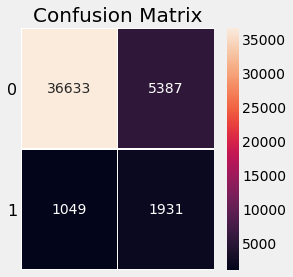

In [347]:
cb = CatBoostClassifier(scale_pos_weight=9,logging_level="Silent")

cb.fit(train_x, train_y)


print_score(cb, train_x, test_x, train_y, test_y,train = True)
print_score(cb, train_x, test_x, train_y, test_y,train = False)

In [348]:
test_score = f1_score(test_y, cb.predict(test_x)) * 100
train_score = f1_score(train_y, cb.predict(train_x)) * 100

results_df_2 = pd.DataFrame(data=[["Cat Boost", train_score, test_score]], 
                          columns=['Model', 'Training f1_score %', 'Testing f1_score %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training f1_score %,Testing f1_score %
0,LGBM,41.318402,41.262404
1,XG Boost,18.760514,18.100267
2,Random Forest,40.294464,39.955326
3,Cat Boost,43.534535,37.502428


# UNDERSAMPLING

In [349]:
#Random Sampling
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
print("Original dataset shape {}".format(Counter(Y)))

Original dataset shape Counter({0: 139974, 1: 10026})


In [350]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_sample(train_x,train_y)
print("Resampled dataset shape {}".format(Counter(y_resampled)))

Resampled dataset shape Counter({0: 7046, 1: 7046})


In [351]:
X_resampled.shape, y_resampled.shape

((14092, 8), (14092,))

### Random Forest

Train Result:
Accuracy Score:  80.17333333333333 %
_______________________________________________
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.79      0.88     97954
           1       0.25      1.00      0.40      7046

    accuracy                           0.80    105000
   macro avg       0.63      0.89      0.64    105000
weighted avg       0.95      0.80      0.85    105000


Classification Report2:	Precision Score: 25.28%
			Recall Score: 99.94%
			F1 score: 40.35%
_______________________________________________
Confusion Matrix: 
 [[77140 20814]
 [    4  7042]]

Test Result:
Accuracy Score: 77.13%
_______________________________________________
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.77      0.86     42020
           1       0.19      0.76      0.31      2980

    accuracy                           0.77     45000
   macro avg       0.58      0.

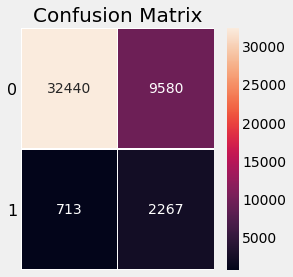

In [352]:
rand_forest = RandomForestClassifier(n_estimators=1000)
rand_forest.fit(X_resampled, y_resampled)

print_score(rand_forest,train_x, test_x, train_y, test_y,train = True)
print_score(rand_forest,train_x, test_x, train_y, test_y,train = False)

In [353]:
test_score = f1_score(test_y, rand_forest.predict(test_x)) * 100
train_score = f1_score(train_y, rand_forest.predict(train_x)) * 100

results_df = pd.DataFrame(data=[["Random Forest", train_score, test_score]], 
                          columns=['Model', 'Training f1_score %', 'Testing f1_score %'])
results_df

,Model,Training f1_score %,Testing f1_score %
0,Random Forest,40.352988,30.579348


### Cat Boost

Train Result:
Accuracy Score:  77.90857142857142 %
_______________________________________________
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.78      0.87     97954
           1       0.21      0.83      0.33      7046

    accuracy                           0.78    105000
   macro avg       0.60      0.80      0.60    105000
weighted avg       0.93      0.78      0.83    105000


Classification Report2:	Precision Score: 20.98%
			Recall Score: 82.87%
			F1 score: 33.49%
_______________________________________________
Confusion Matrix: 
 [[75965 21989]
 [ 1207  5839]]

Test Result:
Accuracy Score: 77.56%
_______________________________________________
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.78      0.87     42020
           1       0.20      0.78      0.32      2980

    accuracy                           0.78     45000
   macro avg       0.59      0.

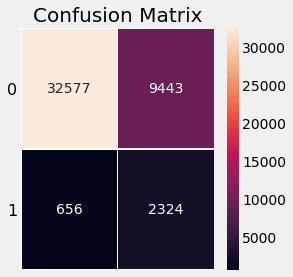

In [354]:
cat_boost = CatBoostClassifier(logging_level="Silent")
cat_boost.fit(X_resampled, y_resampled)


print_score(cat_boost, train_x, test_x, train_y, test_y,train = True)
print_score(cat_boost, train_x, test_x, train_y, test_y,train = False)

In [355]:
test_score = f1_score(test_y, cat_boost.predict(test_x)) * 100
train_score = f1_score(train_y, cat_boost.predict(train_x)) * 100

results_df_2 = pd.DataFrame(data=[["Cat Boost", train_score, test_score]], 
                          columns=['Model', 'Training f1_score %', 'Testing f1_score %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training f1_score %,Testing f1_score %
0,Random Forest,40.352988,30.579348
1,Cat Boost,33.486265,31.518275


### XG Boost

Train Result:
Accuracy Score:  77.67238095238095 %
_______________________________________________
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.77      0.87     97954
           1       0.20      0.81      0.33      7046

    accuracy                           0.78    105000
   macro avg       0.59      0.79      0.60    105000
weighted avg       0.93      0.78      0.83    105000


Classification Report2:	Precision Score: 20.49%
			Recall Score: 80.77%
			F1 score: 32.68%
_______________________________________________
Confusion Matrix: 
 [[75865 22089]
 [ 1355  5691]]

Test Result:
Accuracy Score: 77.61%
_______________________________________________
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.78      0.87     42020
           1       0.20      0.78      0.32      2980

    accuracy                           0.78     45000
   macro avg       0.59      0.

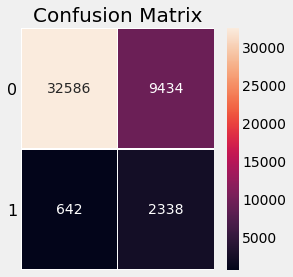

In [356]:
xgb = XGBClassifier(n_estimators=400)
xgb.fit(X_resampled, y_resampled)


print_score(xgb, train_x, test_x, train_y, test_y,train = True)
print_score(xgb, train_x, test_x, train_y, test_y,train = False)

In [357]:
test_score = f1_score(test_y, xgb.predict(test_x)) * 100
train_score = f1_score(train_y, xgb.predict(train_x)) * 100

results_df_2 = pd.DataFrame(data=[["XG Boost", train_score, test_score]], 
                          columns=['Model', 'Training f1_score %', 'Testing f1_score %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training f1_score %,Testing f1_score %
0,Random Forest,40.352988,30.579348
1,Cat Boost,33.486265,31.518275
2,XG Boost,32.682479,31.697397


Train Result:
Accuracy Score:  79.03714285714287 %
_______________________________________________
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.79      0.88     97954
           1       0.21      0.76      0.33      7046

    accuracy                           0.79    105000
   macro avg       0.59      0.78      0.60    105000
weighted avg       0.93      0.79      0.84    105000


Classification Report2:	Precision Score: 20.87%
			Recall Score: 76.07%
			F1 score: 32.75%
_______________________________________________
Confusion Matrix: 
 [[77629 20325]
 [ 1686  5360]]

Test Result:
Accuracy Score: 79.26%
_______________________________________________
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.79      0.88     42020
           1       0.21      0.76      0.33      2980

    accuracy                           0.79     45000
   macro avg       0.59      0.

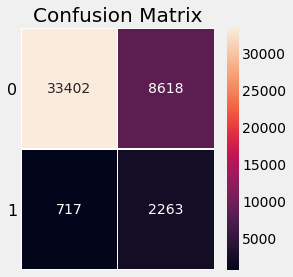

In [358]:
lgbm = LGBMClassifier(max_depth=4,
                       num_leaves=5,
                       learning_rate=0.1,
                       n_estimators=692,
                       min_data_in_leaf = 95,
                       feature_fraction = 0.05,
                       min_child_weight=5,
                       min_child_samples=15,
                       colsample_bytree=0.15,
                       reg_alpha=0.5,
                       reg_lambda=2,
                       random_state=100,
#                        class_weight={0:0.2, 1: 0.8}
                       )
lgbm.fit(X_resampled, y_resampled)

print_score(lgbm, train_x, test_x, train_y, test_y,train = True)
print_score(lgbm, train_x, test_x, train_y, test_y,train = False)

In [359]:
test_score = f1_score(test_y, lgbm.predict(test_x)) * 100
train_score = f1_score(train_y, lgbm.predict(train_x)) * 100

results_df_2 = pd.DataFrame(data=[["LGBM", train_score, test_score]], 
                          columns=['Model', 'Training f1_score %', 'Testing f1_score %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training f1_score %,Testing f1_score %
0,Random Forest,40.352988,30.579348
1,Cat Boost,33.486265,31.518275
2,XG Boost,32.682479,31.697397
3,LGBM,32.751825,32.652767


# OVER SAMPLING

In [360]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

### Light GBM

In [361]:
pipe = make_pipeline(
    SMOTE(sampling_strategy = 0.5),
    LGBMClassifier(max_depth=4,
                       num_leaves=5,
                       learning_rate=0.1,
                       n_estimators=692,
                       min_data_in_leaf = 95,
                       feature_fraction = 0.05,
                       min_child_weight=5,
                       min_child_samples=15,
                       colsample_bytree=0.15,
                       reg_alpha=0.5,
                       reg_lambda=2,
                       random_state=100,)
)

pipe.fit(train_x, train_y)

Pipeline(steps=[('smote', SMOTE(sampling_strategy=0.5)),
                ('lgbmclassifier',
                 LGBMClassifier(colsample_bytree=0.15, feature_fraction=0.05,
                                max_depth=4, min_child_samples=15,
                                min_child_weight=5, min_data_in_leaf=95,
                                n_estimators=692, num_leaves=5,
                                random_state=100, reg_alpha=0.5,
                                reg_lambda=2))])

Train Result:
Accuracy Score:  88.60190476190476 %
_______________________________________________
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94     97954
           1       0.28      0.43      0.34      7046

    accuracy                           0.89    105000
   macro avg       0.62      0.67      0.64    105000
weighted avg       0.91      0.89      0.90    105000


Classification Report2:	Precision Score: 27.61%
			Recall Score: 43.07%
			F1 score: 33.65%
_______________________________________________
Confusion Matrix: 
 [[89997  7957]
 [ 4011  3035]]

Test Result:
Accuracy Score: 88.90%
_______________________________________________
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94     42020
           1       0.28      0.43      0.34      2980

    accuracy                           0.89     45000
   macro avg       0.62      0.

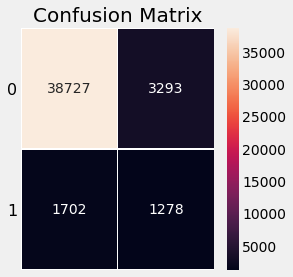

In [362]:
print_score(pipe, train_x, test_x, train_y, test_y,train = True)
print_score(pipe, train_x, test_x, train_y, test_y,train = False)

In [363]:
test_score = f1_score(test_y, pipe.predict(test_x)) * 100
train_score = f1_score(train_y, pipe.predict(train_x)) * 100

results_df = pd.DataFrame(data=[["LGBM", train_score, test_score]], 
                          columns=['Model', 'Training f1_score %', 'Testing f1_score %'])
results_df

,Model,Training f1_score %,Testing f1_score %
0,LGBM,33.651181,33.849821


### Random Forest

Train Result:
Accuracy Score:  99.94095238095238 %
_______________________________________________
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     97954
           1       0.99      1.00      1.00      7046

    accuracy                           1.00    105000
   macro avg       1.00      1.00      1.00    105000
weighted avg       1.00      1.00      1.00    105000


Classification Report2:	Precision Score: 99.49%
			Recall Score: 99.63%
			F1 score: 99.56%
_______________________________________________
Confusion Matrix: 
 [[97918    36]
 [   26  7020]]

Test Result:
Accuracy Score: 88.67%
_______________________________________________
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94     42020
           1       0.26      0.40      0.32      2980

    accuracy                           0.89     45000
   macro avg       0.61      0.

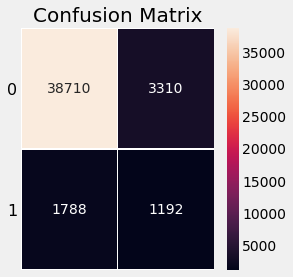

In [364]:
pipe = make_pipeline(
    SMOTE(sampling_strategy = 0.5),
    RandomForestClassifier(n_estimators = 1000)
)

pipe.fit(train_x, train_y)

print_score(pipe, train_x, test_x, train_y, test_y,train = True)
print_score(pipe, train_x, test_x, train_y, test_y,train = False)

In [365]:
test_score = f1_score(test_y, pipe.predict(test_x)) * 100
train_score = f1_score(train_y, pipe.predict(train_x)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest", train_score, test_score]], 
                          columns=['Model', 'Training f1_score %', 'Testing f1_score %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training f1_score %,Testing f1_score %
0,LGBM,33.651181,33.849821
1,Random Forest,99.560346,31.863138


### XG Boost

Train Result:
Accuracy Score:  92.15142857142857 %
_______________________________________________
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     97954
           1       0.38      0.26      0.31      7046

    accuracy                           0.92    105000
   macro avg       0.66      0.62      0.63    105000
weighted avg       0.91      0.92      0.91    105000


Classification Report2:	Precision Score: 37.85%
			Recall Score: 26.41%
			F1 score: 31.11%
_______________________________________________
Confusion Matrix: 
 [[94898  3056]
 [ 5185  1861]]

Test Result:
Accuracy Score: 92.18%
_______________________________________________
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     42020
           1       0.37      0.25      0.30      2980

    accuracy                           0.92     45000
   macro avg       0.66      0.

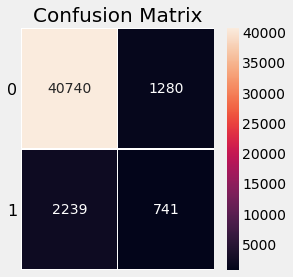

In [366]:
pipe = make_pipeline(
    SMOTE(sampling_strategy = 0.5),
    XGBClassifier(n_estimators=400)
)

pipe.fit(train_x, train_y)

print_score(pipe, train_x, test_x, train_y, test_y,train = True)
print_score(pipe, train_x, test_x, train_y, test_y,train = False)

In [367]:
test_score = f1_score(test_y, pipe.predict(test_x)) * 100
train_score = f1_score(train_y, pipe.predict(train_x)) * 100

results_df_2 = pd.DataFrame(data=[["XG Boost", train_score, test_score]], 
                          columns=['Model', 'Training f1_score %', 'Testing f1_score %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training f1_score %,Testing f1_score %
0,LGBM,33.651181,33.849821
1,Random Forest,99.560346,31.863138
2,XG Boost,31.112597,29.634073


### Cat Boost

Train Result:
Accuracy Score:  93.65714285714286 %
_______________________________________________
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     97954
           1       0.56      0.25      0.35      7046

    accuracy                           0.94    105000
   macro avg       0.75      0.62      0.66    105000
weighted avg       0.92      0.94      0.93    105000


Classification Report2:	Precision Score: 56.04%
			Recall Score: 25.43%
			F1 score: 34.99%
_______________________________________________
Confusion Matrix: 
 [[96548  1406]
 [ 5254  1792]]

Test Result:
Accuracy Score: 93.01%
_______________________________________________
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96     42020
           1       0.44      0.19      0.27      2980

    accuracy                           0.93     45000
   macro avg       0.69      0.

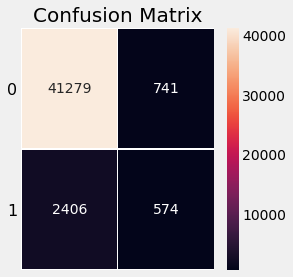

In [368]:
pipe = make_pipeline(
    SMOTE(sampling_strategy = 0.5),
    CatBoostClassifier(logging_level="Silent")
)

pipe.fit(train_x, train_y)

print_score(pipe, train_x, test_x, train_y, test_y,train = True)
print_score(pipe, train_x, test_x, train_y, test_y,train = False)

In [369]:
test_score = f1_score(test_y, pipe.predict(test_x)) * 100
train_score = f1_score(train_y, pipe.predict(train_x)) * 100

results_df_2 = pd.DataFrame(data=[["Cat Boost", train_score, test_score]], 
                          columns=['Model', 'Training f1_score %', 'Testing f1_score %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training f1_score %,Testing f1_score %
0,LGBM,33.651181,33.849821
1,Random Forest,99.560346,31.863138
2,XG Boost,31.112597,29.634073
3,Cat Boost,34.986333,26.728754


# FINAL MODEL

In [372]:
lgbm = LGBMClassifier(max_depth=4,
                       num_leaves=5,
                       learning_rate=0.1,
                       n_estimators=692,
                       min_data_in_leaf = 95,
                       feature_fraction = 0.05,
                       min_child_weight=5,
                       min_child_samples=15,
                       colsample_bytree=0.15,
                       reg_alpha=0.5,
                       reg_lambda=2,
                       random_state=100,
                       class_weight={0:0.2, 1: 0.8}
                       )
lgbm.fit(X, Y)

LGBMClassifier(class_weight={0: 0.2, 1: 0.8}, colsample_bytree=0.15,
               feature_fraction=0.05, max_depth=4, min_child_samples=15,
               min_child_weight=5, min_data_in_leaf=95, n_estimators=692,
               num_leaves=5, random_state=100, reg_alpha=0.5, reg_lambda=2)

In [374]:
filename = "lgbm.sav"
import pickle
pickle_out = open(folder+filename,"wb")
pickle.dump(lgbm,pickle_out)
pickle_out.close()

In [402]:
lgbm.predict(test_x)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [403]:
lgbm.feature_importances_

array([344, 344, 217, 348, 348, 310,  86,  86])

Text(0.5, 1.0, 'Feature Importance')

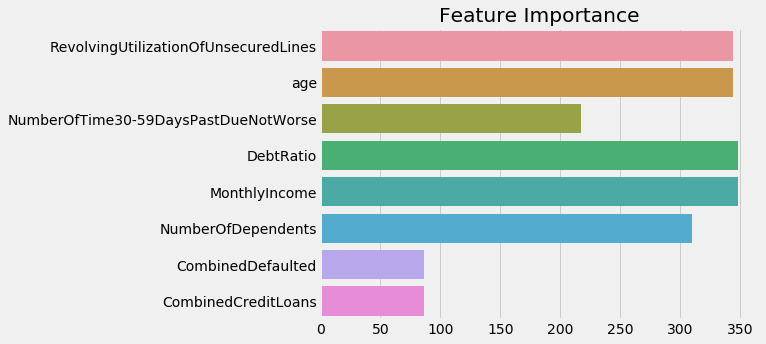

In [405]:
sns.barplot(lgbm.feature_importances_, X.columns)
plt.title("Feature Importance")

In [407]:
from autoviz.AutoViz_Class import AutoViz_Class
av = AutoViz_Class()

Imported AutoViz_Class version: 0.0.68. Call using: 
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
            
To remove previous versions, perform 'pip uninstall autoviz'


Shape of your Data Set: (150000, 12)
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  6
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    11 Predictors classified...
        This does not include the Target column(s)
    1 variables removed since they were ID or low-information variables
    List of variables removed: ['Unnamed: 0']
Since Number of Rows in data 150000 exceeds maximum, randomly sampling 150000 rows for EDA...

################### Binary-Class VISUALIZATION Started #####################
Data Set Shape: 150000 rows, 11 cols

Data Set columns info:
* RevolvingUtilizationOfUnsecuredLines: 0 nulls,

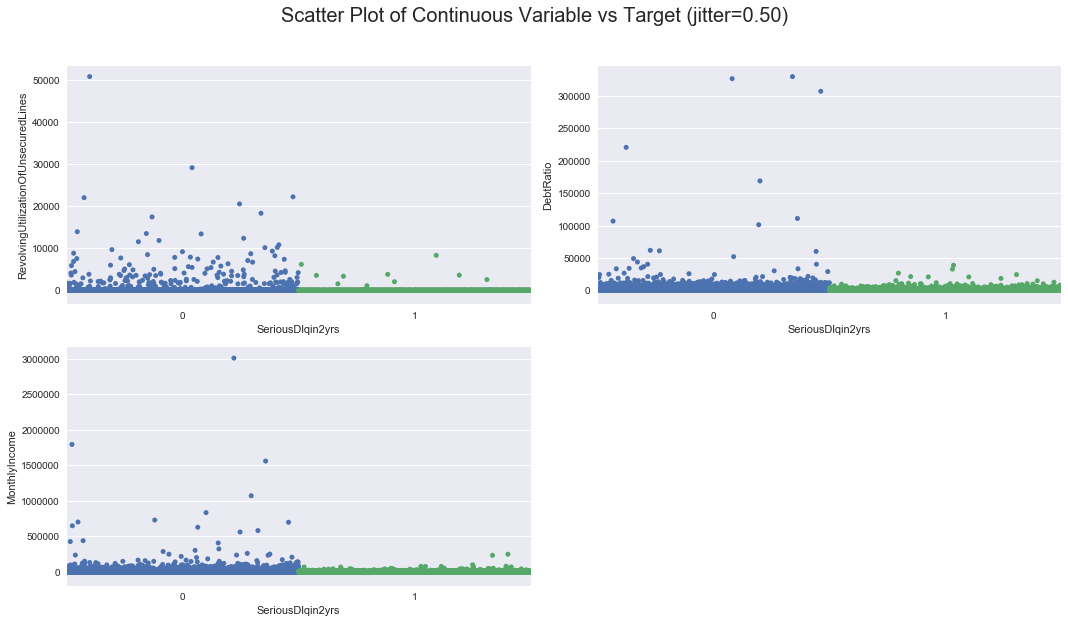

Total Number of Scatter Plots = 6


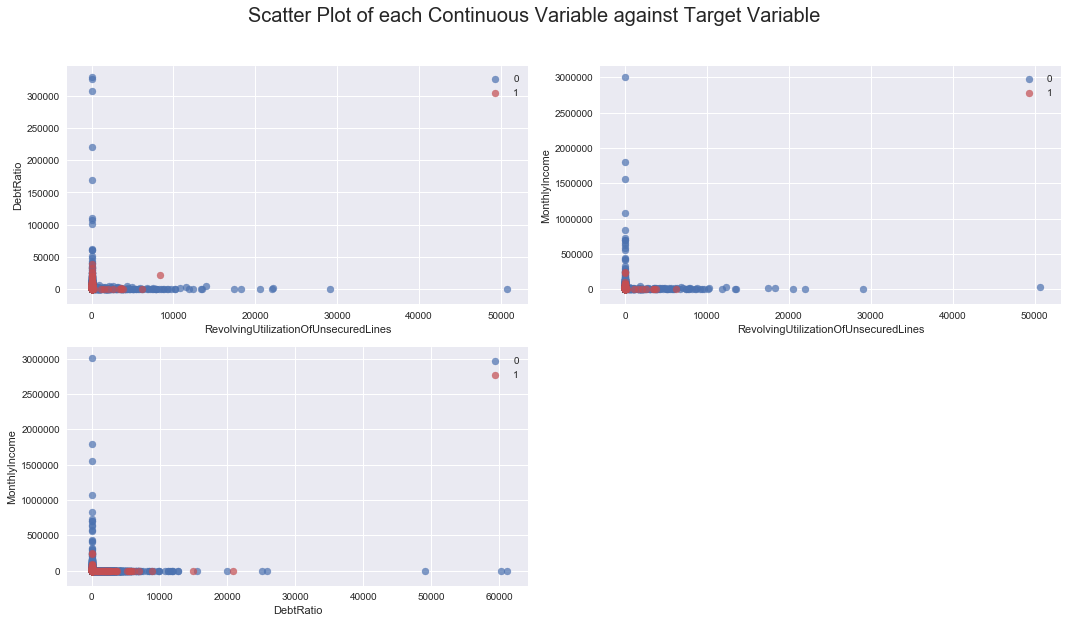

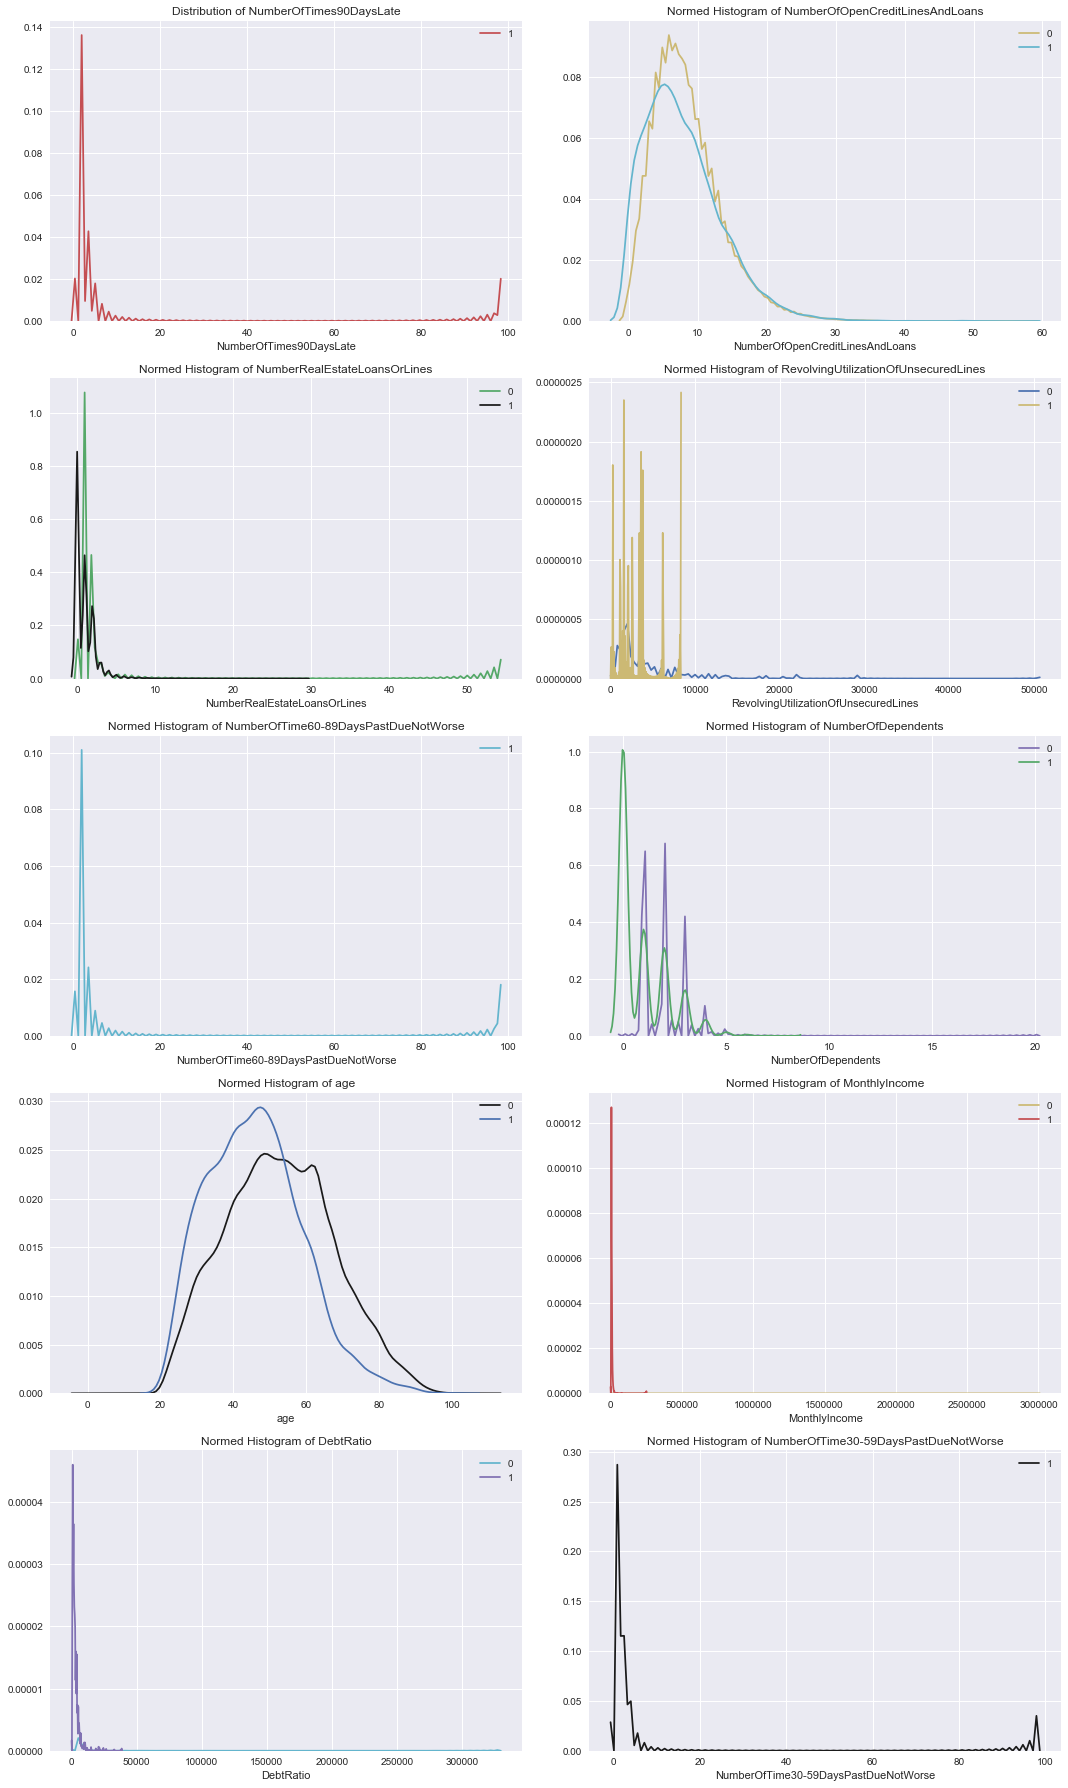

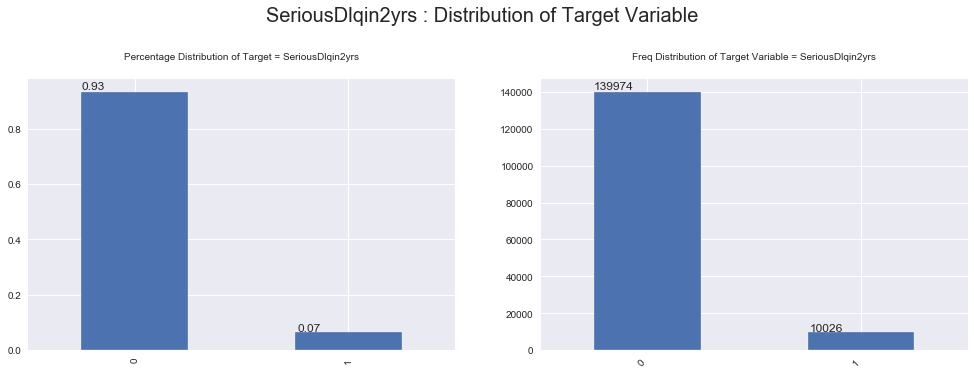

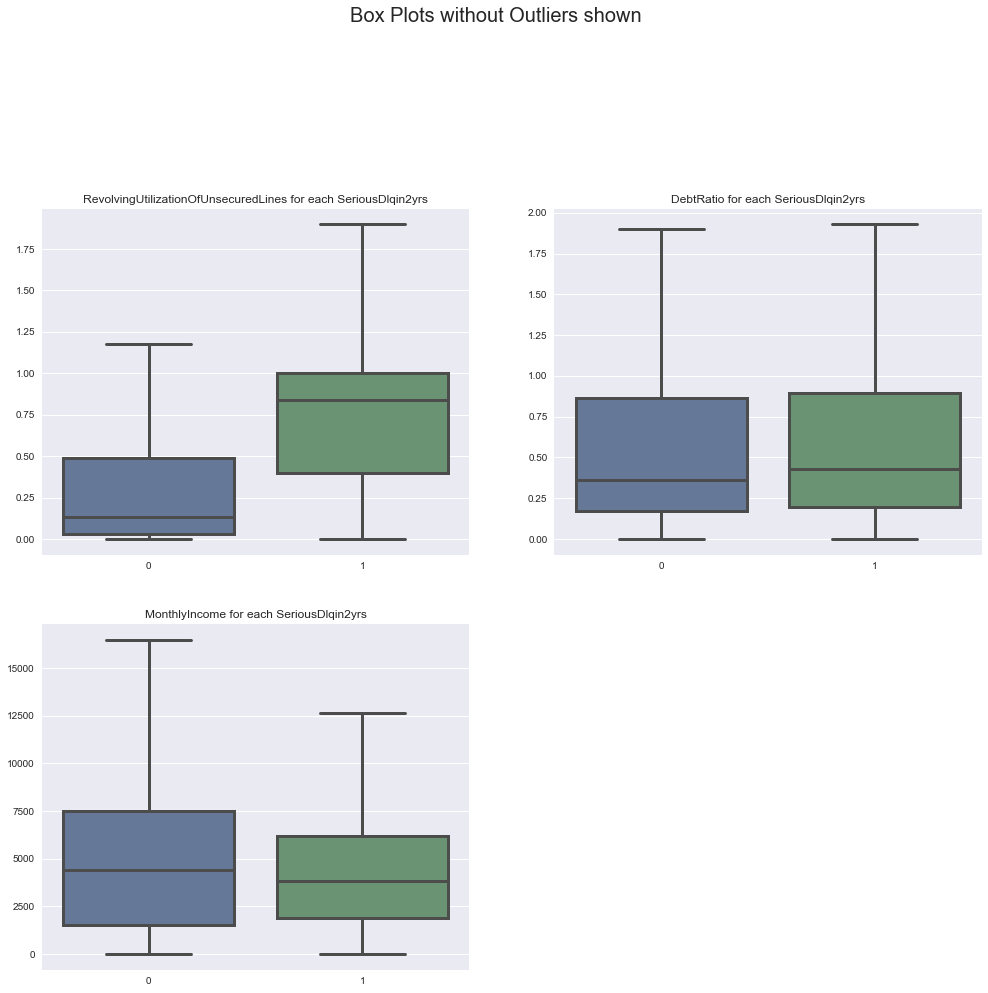

No date vars could be found in data set


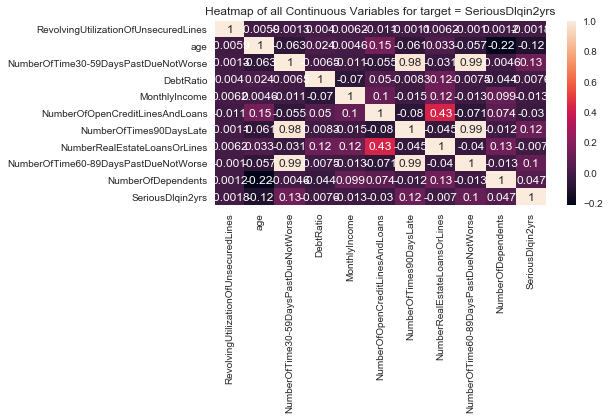

No. of Bar Plots = 21.0


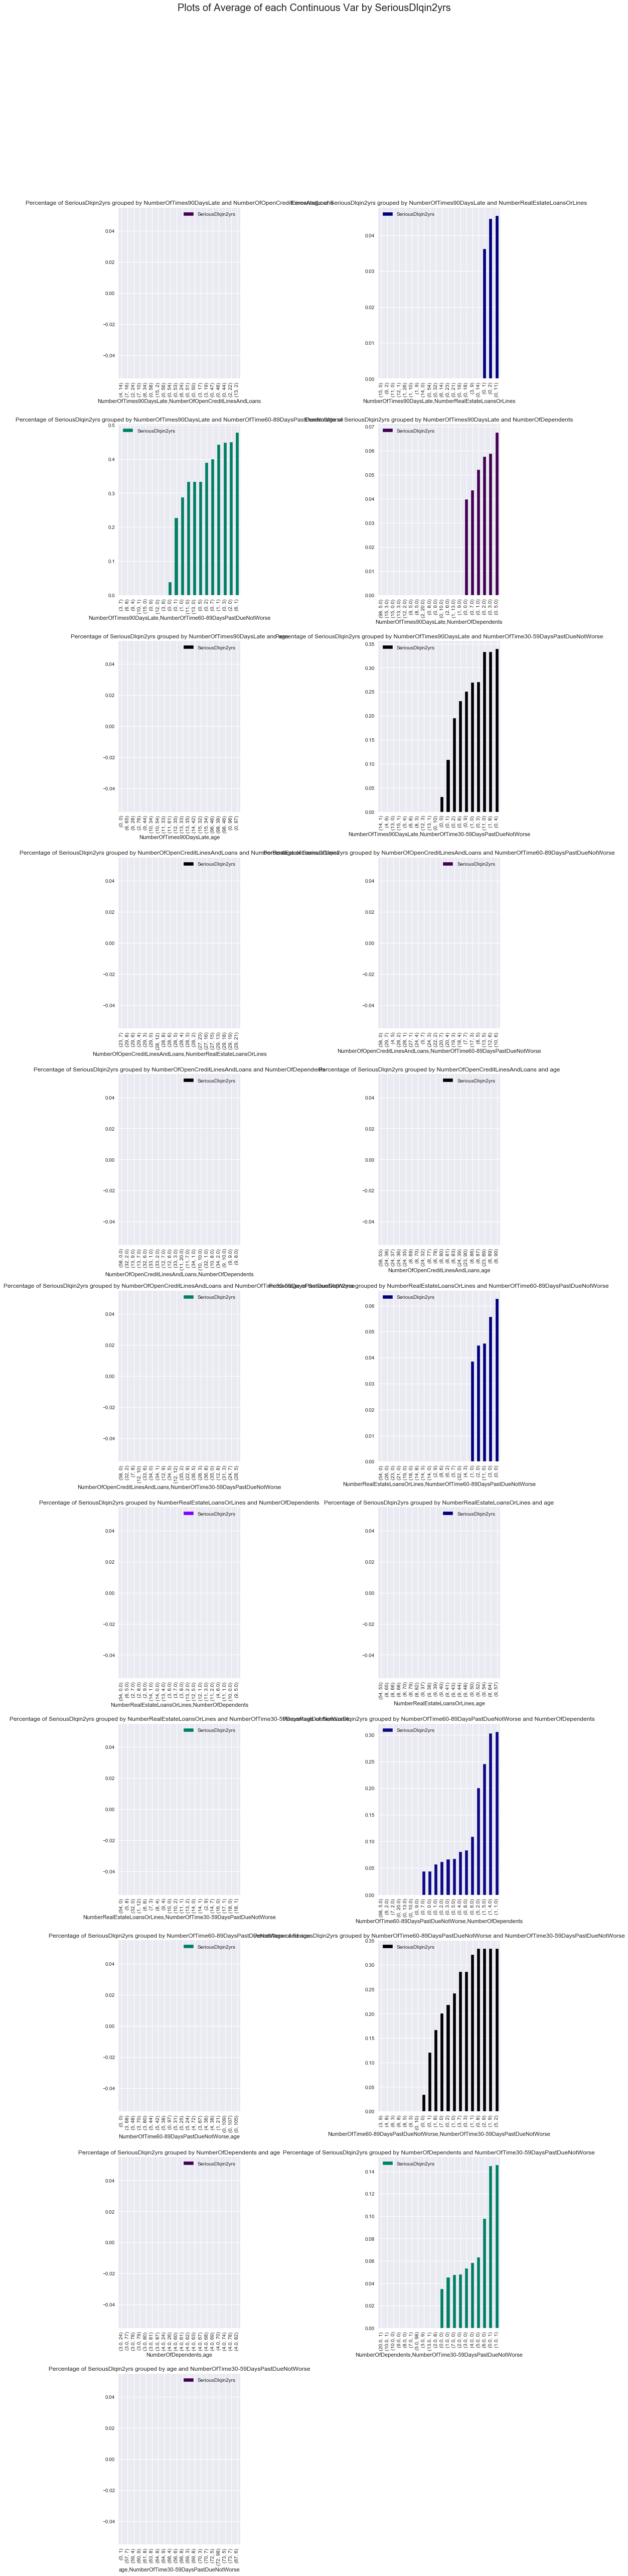

Nothing to add Plot not being added
All plots done
Time to run AutoViz (in seconds) = 130.457

 ###################### VISUALIZATION Completed ########################


In [408]:
dft = av.AutoViz(folder+"Train.csv", depVar="SeriousDlqin2yrs", dfte=None, verbose=1,
                lowess=False, chart_format="svg",max_rows_analyzed=150000,max_cols_analyzed=30)